### [벨만-포드] Gold IV 11657 타임머신

### 문제
N개의 도시가 있다. 그리고 한 도시에서 출발하여 다른 도시에 도착하는 버스가 M개 있다. 각 버스는 A, B, C로 나타낼 수 있는데, A는 시작도시, B는 도착도시, C는 버스를 타고 이동하는데 걸리는 시간이다. 시간 C가 양수가 아닌 경우가 있다. C = 0인 경우는 순간 이동을 하는 경우, C < 0인 경우는 타임머신으로 시간을 되돌아가는 경우이다.

1번 도시에서 출발해서 나머지 도시로 가는 가장 빠른 시간을 구하는 프로그램을 작성하시오.

### 입력
첫째 줄에 도시의 개수 N (1 ≤ N ≤ 500), 버스 노선의 개수 M (1 ≤ M ≤ 6,000)이 주어진다. 둘째 줄부터 M개의 줄에는 버스 노선의 정보 A, B, C (1 ≤ A, B ≤ N, -10,000 ≤ C ≤ 10,000)가 주어진다. 

### 출력
만약 1번 도시에서 출발해 어떤 도시로 가는 과정에서 시간을 무한히 오래 전으로 되돌릴 수 있다면 첫째 줄에 -1을 출력한다. 그렇지 않다면 N-1개 줄에 걸쳐 각 줄에 1번 도시에서 출발해 2번 도시, 3번 도시, ..., N번 도시로 가는 가장 빠른 시간을 순서대로 출력한다. 만약 해당 도시로 가는 경로가 없다면 대신 -1을 출력한다.

### 입출력 예

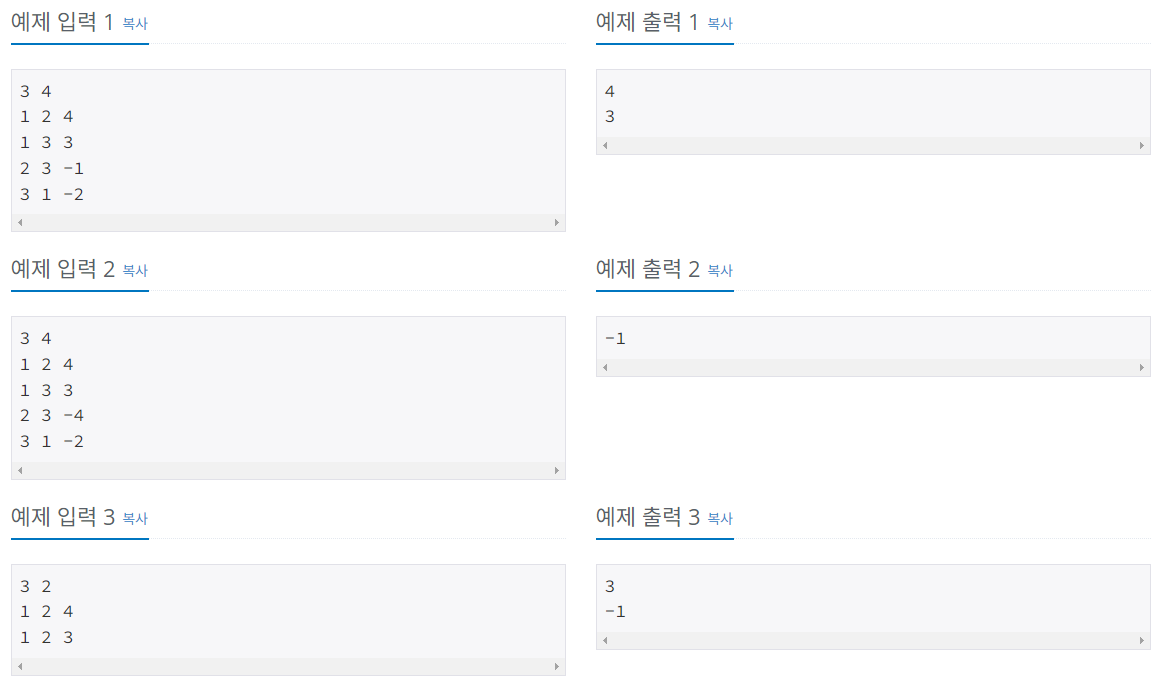

### 내 풀이

In [9]:
import sys

# 입력을 빠르게 받기 위해 sys.stdin.readline 사용
input = sys.stdin.readline

# 도시의 개수 N과 버스 노선의 개수 M 입력
N, M = map(int, input().split())

# 버스 노선의 정보를 담을 리스트와 각 도시까지의 최단 거리를 담을 리스트 초기화
edges = []
distance = [sys.maxsize] * (N + 1)

# M개의 버스 노선 정보 입력 받기
for i in range(M):
    start, end, time = map(int, input().split())
    edges.append((start, end, time))

# 시작 도시(1)의 최단 거리를 0으로 초기화
distance[1] = 0

# N-1번의 루프를 통해 최단 거리 계산
for _ in range(N - 1):
    # 모든 버스 노선에 대해 확인
    for start, end, time in edges:
        # 조건에 맞으면 최단 거리 업데이트
        if distance[start] != sys.maxsize and distance[end] > distance[start] + time:
            distance[end] = distance[start] + time

mCycle = False
# 음수 사이클 확인
for start, end, time in edges:
    if distance[start] != sys.maxsize and distance[end] > distance[start] + time:
        mCycle = True

# 음수 사이클이 없으면 결과 출력
if not mCycle:
    for i in range(2, N + 1):
        if distance[i] != sys.maxsize:
            print(distance[i])  # 최단 거리 출력
        else:
            print(-1)  # 경로가 없는 경우 -1 출력
else:
    print(-1)  # 음수 사이클이 존재하는 경우 -1 출력


### 지피티는 이렇게 풀더라

In [ ]:
import sys

# 무한대를 나타내는 값으로 사용할 INF 설정
INF = sys.maxsize

# 도시의 개수 N과 버스 노선의 개수 M 입력
N, M = map(int, input().split())

# 버스 노선의 정보를 담을 리스트 초기화
edges = []

# M개의 버스 노선 정보 입력 받기
for _ in range(M):
    start, end, time = map(int, input().split())
    edges.append((start, end, time))

# 시작 도시에서 다른 도시로 가는 최단 시간을 나타내는 리스트 초기화
distance = [INF] * (N + 1)
distance[1] = 0  # 시작 도시의 최단 시간은 0

# N-1번의 루프를 통해 최단 거리 계산
for _ in range(N - 1):
    for start, end, time in edges:
        # 시작 도시에서 도착 도시로 가는 거리 업데이트
        if distance[start] != INF and distance[start] + time < distance[end]:
            distance[end] = distance[start] + time

# 음수 사이클 여부 확인
negative_cycle = False
for start, end, time in edges:
    if distance[start] != INF and distance[start] + time < distance[end]:
        negative_cycle = True
        break

# 결과 출력
if negative_cycle:
    print(-1)  # 음수 사이클이 존재하면 -1 출력
else:
    for i in range(2, N + 1):
        # 시작 도시에서 i번 도시까지의 최단 거리 출력
        print(distance[i] if distance[i] != INF else -1)
